# Initial Setup  

## Importing the  data and libraries

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import stopwords 
from nltk.tokenize import WordPunctTokenizer

import time
import math
import json
import os

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

import csv

In [0]:
def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s) 

In [4]:
os.chdir("...filepath")
!ls


'50 K'				 spark-2.4.5-bin-hadoop2.7.tgz.1
 business_data_file.csv		 spark-2.4.5-bin-hadoop2.7.tgz.2
 Dataset_User_Agreement.pdf	 spark-2.4.5-bin-hadoop2.7.tgz.3
 illinois.csv			 spark-2.4.5-bin-hadoop2.7.tgz.4
 merged_dataset2.csv		 spark-2.4.5-bin-hadoop2.7.tgz.5
 merged_dataset.csv		 subset_df.csv
 P.csv				 user_data_file.csv
 P_matrix.csv			 yelp_academic_dataset_business.json
 Q.csv				 yelp_academic_dataset_checkin.json
 Q_matrix.csv			 yelp_academic_dataset_review.json
 review_data_file.csv		 yelp_academic_dataset_tip.json
 spark-2.4.5-bin-hadoop2.7	 yelp_academic_dataset_user.json
 spark-2.4.5-bin-hadoop2.7.tgz


In [0]:
from datetime import datetime
import pytz

## Reading the Data

All the orginial data is in the JSON format. for ease of use, we save them into csv files

In [0]:
users = []
for line in open('yelp_academic_dataset_user.json', 'r'):
    users.append(json.loads(line))

data_file = open('user_data_file.csv', 'w')
csv_writer = csv.writer(data_file)

count = 0
  
for emp in users: 
    if count == 0: 
      
        # Writing headers of CSV file 
        header = emp.keys() 
        csv_writer.writerow(header) 
        count += 1

    # Writing data of CSV file 
    csv_writer.writerow(emp.values()) 
  
data_file.close() 

del users
us_tb = pd.read_csv("user_data_file.csv")
us_tb.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,ntlvfPzc8eglqvk92iDIAw,Rafael,553,2007-07-06 03:27:11,628,225,227,NaN,"oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg...",14,3.57,3,2,1,0,1,11,15,22,22,10,0
1,FOBRPlBHa3WPHFB5qYDlVg,Michelle,564,2008-04-28 01:29:25,790,316,400,"2008,2009,2010,2011,2012,2013","ly7EnE8leJmyqyePVYFlug, pRlR63iDytsnnniPb3AOug...",27,3.84,36,4,5,2,1,33,37,63,63,21,5
2,zZUnPeh2hEp0WydbAZEOOg,Martin,60,2008-08-28 23:40:05,151,125,103,2010,"Uwlk0txjQBPw_JhHsQnyeg, Ybxr1tSCkv3lYA0I1qmnPQ...",5,3.44,9,6,0,1,0,3,7,17,17,4,1
3,QaELAmRcDc5TfJEylaaP8g,John,206,2008-09-20 00:08:14,233,160,84,2009,"iog3Nyg1i4jeumiTVG_BSA, M92xWY2Vr9w0xoH8bPplfQ...",6,3.08,2,1,0,0,0,7,14,7,7,2,0
4,xvu8G900tezTzbbfqmTKvA,Anne,485,2008-08-09 00:30:27,1265,400,512,"2009,2010,2011,2012,2014,2015,2016,2017,2018","3W3ZMSthojCUirKEqAwGNw, eTIbuu23j9tOgmIa9POyLQ...",78,4.37,8,9,2,1,1,22,28,31,31,19,31


In [0]:
business = []
for line in open('yelp_academic_dataset_business.json', 'r'):
    business.append(json.loads(line))

data_file = open('business_data_file.csv', 'w')
csv_writer = csv.writer(data_file)

count = 0
  
for emp in business: 
    if count == 0: 
  
        # Writing headers of CSV file 
        header = emp.keys() 
        csv_writer.writerow(header) 
        count += 1
  
    # Writing data of CSV file 
    csv_writer.writerow(emp.values()) 
  
data_file.close() 

del business
business_tb = pd.read_csv("business_data_file.csv")
business_tb.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",NaN
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,NaN,"Pets, Pet Services, Pet Groomers",NaN
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726649,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


In [0]:
review = []
for line in open('yelp_academic_dataset_review.json', 'r'):
    review.append(json.loads(line))


data_file = open('review_data_file.csv', 'w')
csv_writer = csv.writer(data_file)

count = 0
  
for emp in review: 
    if count == 0: 
  
        # Writing headers of CSV file 
        header = emp.keys() 
        csv_writer.writerow(header) 
        count += 1
  
    # Writing data of CSV file 
    csv_writer.writerow(emp.values()) 
  
data_file.close() 
del review
review_tb = pd.read_csv("review_data_file.csv")
review_tb.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,5,0,0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1.0,1,1,0,I am actually horrified this place is still in...,2013-12-07 03:16:52
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,0,0,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4.0,0,0,0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57


## Preliminary analysis of the data

In [0]:
 print("\033[1mRaw Data Stats:\033[0m \n")

print("Number of Businesses in the data :", len(business_tb['business_id'].unique()))
print(f"Across {len(business_tb['state'].unique())} states and {len(business_tb['city'].unique())} cities :" )
print("Number of Users in the data      :", len(us_tb['user_id'].unique()))
print("Number of Reviews in the data    :", len(review_tb['review_id'].unique()))


Raw Data Stats: 

Number of Businesses in the data : 209393
Across 37 states and 1251 cities :
Number of Users in the data      : 1968703
Number of Reviews in the data    : 8021122


## Extracting the relevant variables

Now, that we have the 3 tables for users, businesses and reviews, we will be joining the dataframes and retaining only the relavant entries 

In [0]:
#Since we wont be using all the attributes in the review table, we save the relevant columns in a new dataframe
subset_df = review_tb[['review_id', 'user_id', 'business_id', 'stars', 'text', 'date']]
subset_df.columns = ['review_id', 'user_id', 'business_id', 'review_stars', 'text', 'date'] #renaming the columns for ease
subset_df.head()

,review_id,user_id,business_id,review_stars,text,date
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,As someone who has worked ...,2015-04-15 05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1.0,I am actually horrified th...,2013-12-07 03:16:52
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,I love Deagan's. I do. I r...,2015-12-05 03:18:11
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,"Dismal, lukewarm, defroste...",2011-05-27 05:30:52
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4.0,"Oh happy day, finally have...",2017-01-14 21:56:57


## Identifying relevant businesses

In [0]:
# for the business tabel, we would have to do a little clean up the Categories column. 
# The objective is to identify the businesses with the tag 'Restaurant' in them.
# The count column measures the number of categories tag per business. 
business_tb = pd.read_csv("business_data_file.csv")
business_tb['categories'] = business_tb['categories'].apply(lambda x: str(x).split(','))
business_tb['categories'] = business_tb['categories'].apply(lambda x: [y.strip() for y in x])

business_tb['count'] = business_tb['categories'].apply(lambda x: len(x))
business_tb['food'] = business_tb['categories'].apply(lambda x: 'Restaurants' in x)
business_tb.head()


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,count,food
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,{'BusinessAcceptsCreditCar...,"[Active Life, Gun/Rifle Ra...","{'Monday': '10:0-18:0', 'T...",4,False
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'B...","[Health & Medical, Fitness...",NaN,5,False
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,NaN,"[Pets, Pet Services, Pet G...",NaN,3,False
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,{'BusinessAcceptsCreditCar...,"[Hardware Stores, Home Ser...","{'Monday': '7:0-16:0', 'Tu...",5,False
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726649,4.5,26,1,{'BusinessAcceptsCreditCar...,"[Home Services, Plumbing, ...","{'Monday': '0:0-0:0', 'Tue...",5,False


In [0]:
#let us look at the total number of businesses that have the tag 'Restaurants' 

count  = pd.DataFrame(business_tb['food'].value_counts())
count.columns = ['Food']
count

,Food
False,145449
True,63944


We see there are about 60K businesses with the tag 'Restaurants'

In [0]:
# Let us now merge the subset and business table to add the business name, state. 
pd.options.display.max_colwidth=30
subset_df = pd.merge(subset_df,business_tb, how= 'left',on='business_id')[['review_id', 'user_id', 'business_id','name','city','state', 'review_stars', 'text', 'date','categories','food']]
subset_df.columns = ['review_id', 'user_id', 'business_id', 'business_name','city', 'state','review_stars', 'text', 'date',  'categories', 'food']
# Renaming columns to reflect the appropriate heading


#Joining the table with the user table to add the user name, and the data since when the user has been on Yelp
subset_df = pd.merge(subset_df,us_tb, how= 'left',on='user_id')[['review_id', 'user_id', 'business_id', 
                                                     'business_name','city', 'state','review_stars', 'text', 'date', 'categories', 'food', 'name']]
subset_df.head()

,review_id,user_id,business_id,business_name,city,state,review_stars,text,date,categories,food,name
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,Bellagio Gallery of Fine Art,Las Vegas,NV,2.0,As someone who has worked ...,2015-04-15 05:21:16,"[Shopping, Arts & Entertai...",False,Jamie
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,Rio Hair Salon,Chandler,AZ,1.0,I am actually horrified th...,2013-12-07 03:16:52,"[Beauty & Spas, Hair Salons]",False,Nicole
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,Deagan's Kitchen & Bar,Lakewood,OH,5.0,I love Deagan's. I do. I r...,2015-12-05 03:18:11,"[Restaurants, Gastropubs, ...",True,Danielle
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,Cabo Mexican Restaurant,Las Vegas,NV,1.0,"Dismal, lukewarm, defroste...",2011-05-27 05:30:52,"[Restaurants, Mexican]",True,Butch
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,Raising Cane's Chicken Fin...,Henderson,NV,4.0,"Oh happy day, finally have...",2017-01-14 21:56:57,"[Fast Food, Restaurants, S...",True,Micah


For the ALS algorithm, the user ids and the item ids have to be integer values, thus, we have to create a uiz and biz for the same

In [0]:
#Generating the numeric ids
uiz = sorted(list(subset_df['user_id'].unique()))
uiz = {uiz[k]:k for k in range(len(uiz))} 

biz = sorted(list(subset_df['business_id'].unique()))
biz = {biz[k]:k for k in range(len(biz))}

# updating the subset dataframe
subset_df['uiz'] = subset_df['user_id'].apply(lambda x: uiz[x])
subset_df['biz'] = subset_df['business_id'].apply(lambda x: biz[x])
subset_df.head()

,review_id,user_id,business_id,business_name,city,state,review_stars,text,date,categories,food,name,uiz,biz
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,Bellagio Gallery of Fine Art,Las Vegas,NV,2.0,As someone who has worked ...,2015-04-15 05:21:16,"[Shopping, Arts & Entertai...",False,Jamie,797678,1205
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,Rio Hair Salon,Chandler,AZ,1.0,I am actually horrified th...,2013-12-07 03:16:52,"[Beauty & Spas, Hair Salons]",False,Nicole,1578288,162380
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,Deagan's Kitchen & Bar,Lakewood,OH,5.0,I love Deagan's. I do. I r...,2015-12-05 03:18:11,"[Restaurants, Gastropubs, ...",True,Danielle,986024,60325
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,Cabo Mexican Restaurant,Las Vegas,NV,1.0,"Dismal, lukewarm, defroste...",2011-05-27 05:30:52,"[Restaurants, Mexican]",True,Butch,1620429,20429
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,Raising Cane's Chicken Fin...,Henderson,NV,4.0,"Oh happy day, finally have...",2017-01-14 21:56:57,"[Fast Food, Restaurants, S...",True,Micah,974620,63596


## Filtering based on Business type and Location
Now that we have extracted relevant variables, we will filter out the rows, we will retain all restaurants in Illinois. 

In [0]:
subset_df = subset_df[subset_df['food'] == True]

#Quick Stats Check : 
print("\033[1mRemaining Data Points for Restaurants\033[0m\n")
print("Number of Restaurants in the data :", len(subset_df['business_id'].unique()))
print(f"Across {len(subset_df['state'].unique())} states and {len(subset_df['city'].unique())} cities" )
print("Number of Users in the data      :", len(subset_df['user_id'].unique()))
print("Number of Reviews in the data    :", len(subset_df['review_id'].unique()))

subset_df.head()

Remaining Data Points for Restaurants

Number of Restaurants in the data : 63944
Across 28 states and 813 cities
Number of Users in the data      : 1399916
Number of Reviews in the data    : 5055992


,review_id,user_id,business_id,business_name,city,state,review_stars,text,date,categories,food,name,uiz,biz
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,Deagan's Kitchen & Bar,Lakewood,OH,5.0,I love Deagan's. I do. I r...,2015-12-05 03:18:11,"[Restaurants, Gastropubs, ...",True,Danielle,986024,60325
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,Cabo Mexican Restaurant,Las Vegas,NV,1.0,"Dismal, lukewarm, defroste...",2011-05-27 05:30:52,"[Restaurants, Mexican]",True,Butch,1620429,20429
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,Raising Cane's Chicken Fin...,Henderson,NV,4.0,"Oh happy day, finally have...",2017-01-14 21:56:57,"[Fast Food, Restaurants, S...",True,Micah,974620,63596
5,L2O_INwlrRuoX05KSjc4eg,5vD2kmE25YBrbayKhykNxQ,nlxHRv1zXGT0c0K51q3jDg,Firehouse Subs,Henderson,NV,5.0,This is definitely my favo...,2013-05-07 07:25:25,"[Restaurants, Delis, Sandw...",True,Gary,213081,169503
6,ZayJ1zWyWgY9S_TRLT_y9Q,aq_ZxGHiri48TUXJlpRkCQ,Pthe4qk5xh4n-ef-9bvMSg,Chon Thai Food,Chandler,AZ,5.0,Really good place with sim...,2015-11-05 23:11:05,"[Restaurants, Thai]",True,Jagan,1194664,87979


In [0]:
subset_df = subset_df[subset_df['state'] == 'IL'].reset_index(drop=True)

print("\033[1mFinal Data Points\033[0m \n ")
print("Number of Restaurants in the Illinois   :", len(subset_df['business_id'].unique()))
print(f"Across {len(subset_df['city'].unique())} cities" )
print("Number of Users in the Illinois         :", len(subset_df['user_id'].unique()))
print("Number of Reviews  for them in Illinois :", len(subset_df['review_id'].unique()))

subset_df.head()

Final Data Points 
 
Number of Restaurants in the Illinois   : 702
Across 20 cities
Number of Users in the Illinois         : 12255
Number of Reviews  for them in Illinois : 32327


,review_id,user_id,business_id,business_name,city,state,review_stars,text,date,categories,food,name,uiz,biz
0,m4AXzV9l14iFBd9DRdM82w,6X0i-oGUbh5DZdTHzFuKfg,9A1C1f0m4nQltQrOOTl-Kw,Orange & Brew,Champaign,IL,1.0,The building is lovely. T...,2013-12-07 02:26:13,"[American (New), Nightlife...",True,Helen,231793,32972
1,A-yKlSLEQQcoHR5q2lCyHg,Yximlvn0cfb3yVDaLuXDxw,VHsNB3pdGVcRgs6C3jt6Zg,Dublin O'Neil's,Champaign,IL,5.0,LOVE LOVE LOVE this place!...,2013-08-03 19:59:56,"[Restaurants, Irish]",True,Angela,1106075,105571
2,asLnux3k2yqoVjcJcLuF0g,Cz8l7JQ2I_RhtK0BosH-7Q,Ah4i15g8Ow_zphzcpulTxQ,The Bread Company,Urbana,IL,4.0,The bread company is perfe...,2015-12-05 05:38:55,"[Bakeries, American (New),...",True,Charlie,429645,38153
3,YIMS3PGxfWN5iFIIcYJHEg,m7rosN4Yh__tXkWP0_myqw,9MnbQg7kfb_WgxoV0hXKSQ,Black Dog Smoke & Ale House,Urbana,IL,5.0,This is the best restauran...,2015-06-21 01:54:38,"[Barbeque, Restaurants, Am...",True,Seth,1542529,33678
4,CWjzk0w-OZwzOmCut-6bvQ,iYwDTxhYStsIDHB514ltjA,t_yiQnxUDdPPCN2z4QyezA,Golden Harbor Authentic Ch...,Champaign,IL,5.0,"If you want REAL, AUTHENTI...",2015-09-23 23:23:51,"[Restaurants, Chinese, Tai...",True,Elizabeth,1432036,188347


Now we have all of our variable ready, saved in the subset_df. 
Throughout the notebook, save checkpoints have been incorporated to ensure we dont waste too much time re running the cells.  

In [0]:
subset_df.to_csv("illinois.csv",index=False)##save checkpoint

After the data has been prepped, we will always read it from the below cell to save time

In [11]:
# us_tb = pd.read_csv("user_data_file.csv")
business_tb = pd.read_csv("business_data_file.csv")
# review_tb = pd.read_csv("review_data_file.csv")
subset_df = pd.read_csv('illinois.csv')

print("Finished reading the data")

Finished reading the data


In [9]:
subset_df.head()

,review_id,user_id,business_id,business_name,city,state,review_stars,text,date,categories,food,name,uiz,biz
0,m4AXzV9l14iFBd9DRdM82w,6X0i-oGUbh5DZdTHzFuKfg,9A1C1f0m4nQltQrOOTl-Kw,Orange & Brew,Champaign,IL,1.0,The building is lovely. The remodel after But...,2013-12-07 02:26:13,"['American (New)', 'Nightlife', 'Restaurants',...",True,Helen,231793,32972
1,A-yKlSLEQQcoHR5q2lCyHg,Yximlvn0cfb3yVDaLuXDxw,VHsNB3pdGVcRgs6C3jt6Zg,Dublin O'Neil's,Champaign,IL,5.0,LOVE LOVE LOVE this place! I'm a bit of a suck...,2013-08-03 19:59:56,"['Restaurants', 'Irish']",True,Angela,1106075,105571
2,asLnux3k2yqoVjcJcLuF0g,Cz8l7JQ2I_RhtK0BosH-7Q,Ah4i15g8Ow_zphzcpulTxQ,The Bread Company,Urbana,IL,4.0,The bread company is perfect for lunch. The pr...,2015-12-05 05:38:55,"['Bakeries', 'American (New)', 'Modern Europea...",True,Charlie,429645,38153
3,YIMS3PGxfWN5iFIIcYJHEg,m7rosN4Yh__tXkWP0_myqw,9MnbQg7kfb_WgxoV0hXKSQ,Black Dog Smoke & Ale House,Urbana,IL,5.0,This is the best restaurant under $30 per plat...,2015-06-21 01:54:38,"['Barbeque', 'Restaurants', 'American (Traditi...",True,Seth,1542529,33678
4,CWjzk0w-OZwzOmCut-6bvQ,iYwDTxhYStsIDHB514ltjA,t_yiQnxUDdPPCN2z4QyezA,Golden Harbor Authentic Chinese Cuisine,Champaign,IL,5.0,"If you want REAL, AUTHENTIC asian food, this i...",2015-09-23 23:23:51,"['Restaurants', 'Chinese', 'Taiwanese', 'Dim S...",True,Elizabeth,1432036,188347


# Recommender systems using ALS

##Setting up a spark session

In [0]:
%%time
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://apache.mirrors.hoobly.com/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar -xvf spark-2.4.5-bin-hadoop2.7.tgz
!pip install -q findspark

# outputs cleared since they are really long

In [7]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "...filepath/spark-2.4.5-bin-hadoop2.7"

import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

print("Done")

Done


## Using Pyspark dataframes to apply ALS

In [0]:
# import libraries
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.ml.tuning import TrainValidationSplit, ParamGridBuilder
from pyspark.sql import Row


In [12]:
#Converting the dataframe's datatype to string to convert it into a pyspark dataframe
data = subset_df.astype(str)

data_spark = spark.createDataFrame(data)
data_spark.show()

+--------------------+--------------------+--------------------+--------------------+---------+-----+------------+--------------------+-------------------+--------------------+----+---------+-------+------+
|           review_id|             user_id|         business_id|       business_name|     city|state|review_stars|                text|               date|          categories|food|     name|    uiz|   biz|
+--------------------+--------------------+--------------------+--------------------+---------+-----+------------+--------------------+-------------------+--------------------+----+---------+-------+------+
|m4AXzV9l14iFBd9DR...|6X0i-oGUbh5DZdTHz...|9A1C1f0m4nQltQrOO...|       Orange & Brew|Champaign|   IL|         1.0|The building is l...|2013-12-07 02:26:13|['American (New)'...|True|    Helen| 231793| 32972|
|A-yKlSLEQQcoHR5q2...|Yximlvn0cfb3yVDaL...|VHsNB3pdGVcRgs6C3...|     Dublin O'Neil's|Champaign|   IL|         5.0|LOVE LOVE LOVE th...|2013-08-03 19:59:56|['Restaurants', '

In [13]:
#convert stars / Biz/ Uiz back to right data-type
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType

df1 = data_spark.withColumn("review_stars",col("review_stars").cast(FloatType())).withColumn("Biz",col("Biz").cast(IntegerType())).withColumn("Uiz",col("Uiz").cast(IntegerType()))
df1.printSchema()

root
 |-- review_id: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- business_id: string (nullable = true)
 |-- business_name: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- review_stars: float (nullable = true)
 |-- text: string (nullable = true)
 |-- date: string (nullable = true)
 |-- categories: string (nullable = true)
 |-- food: string (nullable = true)
 |-- name: string (nullable = true)
 |-- Uiz: integer (nullable = true)
 |-- Biz: integer (nullable = true)



In [14]:
#split dataset into training, validation, and testing
import random
random.seed(123)
(training, validation,testing) = df1.randomSplit([0.60,0.10, 0.3])
fulltraining = training.union(validation)
fulltraining.show(10)

+--------------------+--------------------+--------------------+--------------------+---------+-----+------------+--------------------+-------------------+--------------------+----+-------+-------+------+
|           review_id|             user_id|         business_id|       business_name|     city|state|review_stars|                text|               date|          categories|food|   name|    Uiz|   Biz|
+--------------------+--------------------+--------------------+--------------------+---------+-----+------------+--------------------+-------------------+--------------------+----+-------+-------+------+
|--SLN7EAbVScyHWf3...|tdhL5mDtnZWFqAbSR...|-5NXoZeGBdx3Bdk70...| Po' Boys Restaurant|   Urbana|   IL|         5.0|Great crispy crus...|2014-08-15 20:45:52|['Pizza', 'Barbeq...|True|  Jenna|1773435|   317|
|-1n6GIYFof3d79sQW...|qJfW5-Z890LfBV62x...|1c4IxxSQxuh2mHVm6...|     Tks Cheesesteak|  Rantoul|   IL|         5.0|I had heard that ...|2018-08-07 17:43:17|['Restaurants', '...|True

## Training and Tuning the ALS Model

Now we apply the ALS algorithm. We will tune the Rank as well as the regularizer





In [0]:
%%time

#Cross validation

# als = ALS(userCol="Uiz", itemCol="Biz", ratingCol="review_stars", nonnegative=True, implicitPrefs = True)
als = ALS(userCol="Uiz", itemCol="Biz", ratingCol="review_stars", nonnegative=True, implicitPrefs = True)
evaluator = RegressionEvaluator(metricName="rmse", labelCol="review_stars",predictionCol="prediction")

ranks = [x for x in range(5,150,15)]
regparam = [.1,.15,.25,.35,.5]

# ranks = [x for x in range(5,20,5)]
# regparam = [.1,.15]

best_par = -10
best_rank = -10

min_err = float('inf')

Reg = ['Regulariser']
cv_table = pd.DataFrame(columns = Reg )
cv_table['Regulariser'] = regparam

print("Starting the training process")
for r in ranks:
  als.setRank(r)
  j = 0

  for par in regparam:


    als.setRegParam(par)
    model = als.fit(training)
    pred = model.transform(validation)
    pred_clean = pred.filter(pred.prediction !=float('nan') )
    rmse = evaluator.evaluate(pred_clean)

    cv_table.loc[j,r] = rmse

    j+=1 

    if rmse < min_err:
      min_err = rmse
      best_rank = r
      best_par = par
    
    

print("Best Rank = ",best_rank ,"Best Regularizer", best_par, "Min Error", round(min_err,4) )

Starting the training process
Best Rank =  20 Best Regularizer 0.15 Min Error 3.7402
CPU times: user 4.86 s, sys: 1.81 s, total: 6.67 s
Wall time: 22min 17s


In [0]:
cv_table

,Regulariser,5,20,35,50,65,80,95,110,125,140
0,0.10,3.740336,3.740448,3.747565,3.751166,3.756509,3.756493,3.757807,3.760490,3.758218,3.759604
1,0.15,3.740470,3.740172,3.746919,3.750511,3.755454,3.754743,3.756130,3.758642,3.756294,3.757503
2,0.25,3.742896,3.741599,3.747253,3.750743,3.754777,3.752935,3.755938,3.756315,3.755178,3.756792
3,0.35,3.745724,3.745761,3.749460,3.751123,3.756005,3.753718,3.756922,3.756599,3.754715,3.756533
4,0.50,3.752201,3.752346,3.753426,3.753449,3.758591,3.756459,3.759664,3.758129,3.756420,3.758250


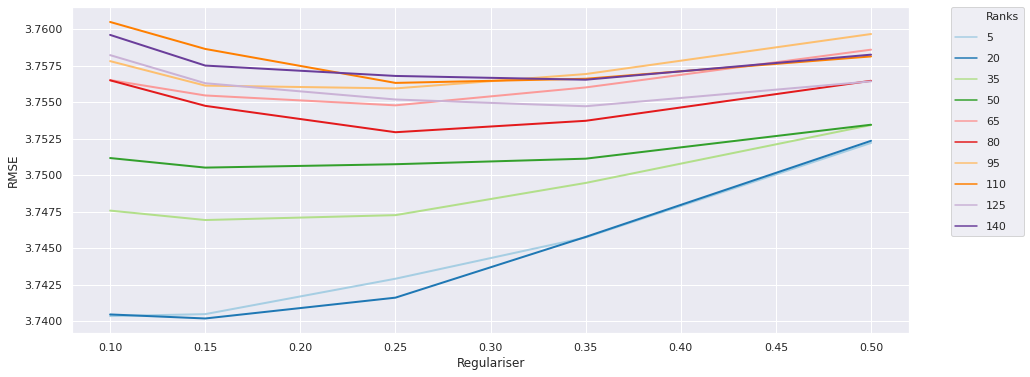

In [0]:
#Let us visualise the RMSE by each rank

fig, ax =plt.subplots(1,1 , figsize=(15,6))

data1 = pd.melt(cv_table, ['Regulariser'])#reshaping the dataframe for visualisation 
data1.columns = ['Regulariser', 'Ranks', 'RMSE']


sns.set_context('poster')
sns.set_context('notebook')
sns.lineplot(x='Regulariser', y='RMSE', hue='Ranks', data=data1,palette= sns.color_palette('Paired', n_colors=len(ranks)), linewidth=2)
ax.legend(ranks, loc = 'right' )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# We can see the best regulariser giving us the lowest RMSE shown below

In [15]:
#using the best rank and regulariser to train the model 

als = ALS(userCol="Uiz", itemCol="Biz", ratingCol="review_stars", nonnegative=True)
evaluator = RegressionEvaluator(metricName="rmse", labelCol="review_stars",predictionCol="prediction")

# als.setRank(best_rank)
# als.setRegParam(best_par)

als.setRank(20)
als.setRegParam(.15)
model = als.fit(fulltraining)

# Evaluate the model by computing the RMSE on the test data
predictions = model.transform(testing)
rmse = evaluator.evaluate(predictions)
predicted_clean = predictions.filter(predictions.prediction != float('nan'))

rmse = evaluator.evaluate(predicted_clean)
# print("Rank = ",best_rank ,"Regularizer", best_par)
print("Root-mean-square error = " , round(rmse,4))

Root-mean-square error =  1.4811


## Generating the recommendations 

In [54]:
# Generate top 3 restaurant recommendations for each user
num_recs = 5
userRecs = model.recommendForAllUsers(num_recs)
userRecs.show()

+-------+--------------------+
|    Uiz|     recommendations|
+-------+--------------------+
| 436580|[[32787, 5.108916...|
| 700060|[[141789, 4.96526...|
| 864850|[[32787, 2.161091...|
| 899350|[[109501, 5.03407...|
|1441420|[[156010, 3.86937...|
|1718120|[[24758, 0.967651...|
| 195541|[[176132, 4.96111...|
| 396561|[[190126, 0.96230...|
| 532681|[[176132, 5.02769...|
| 895361|[[68117, 4.818404...|
|1649661|[[148605, 1.92626...|
| 195642|[[65473, 2.891005...|
| 628252|[[72729, 4.54981]...|
| 868602|[[32787, 5.005036...|
|1112452|[[46634, 1.267861...|
|1199942|[[32787, 2.954661...|
|1883862|[[111433, 4.82974...|
| 288113|[[174364, 1.04097...|
| 921353|[[25361, 4.668594...|
|1257263|[[32787, 4.521247...|
+-------+--------------------+
only showing top 20 rows



In [0]:
# To get back the name of the business and the users, 
# we create dictionaries to reverse map the same. 

mymap = subset_df[['biz','business_name']]
mapper = {}

for i in range(len(subset_df)):
  mapper[mymap['biz'][i]] = mymap['business_name'][i]
usermap = subset_df[['uiz','name']]
user_mapper = {}
for i in range(len(subset_df)):
  user_mapper[usermap['uiz'][i]] = usermap['name'][i]
del mymap
del usermap

In [56]:
# convert to pandas dataframe
result_als = userRecs.select("*").toPandas()
result_als["recommendations"] = result_als["recommendations"].apply(lambda x: [x[i][0] for i in range(num_recs)] )#removing the restaurant ratings, retaining only the ids
result_als.columns = ['User_Id', "Recommendations"]
result_als.head(10)

,User_Id,Recommendations
0,436580,"[32787, 62976, 3170, 120104, 77241]"
1,700060,"[141789, 72163, 48058, 51478, 100452]"
2,864850,"[32787, 18409, 3170, 6142, 105571]"
3,899350,"[109501, 31923, 70581, 141789, 44412]"
4,1441420,"[156010, 32787, 18409, 130691, 48058]"
5,1718120,"[24758, 33077, 141789, 46634, 54516]"
6,195541,"[176132, 141789, 45871, 105593, 114886]"
7,396561,"[190126, 46274, 25361, 100434, 32787]"
8,532681,"[176132, 141789, 105593, 114886, 18409]"
9,895361,"[68117, 32787, 141789, 176132, 170945]"


In [57]:
## now we have to clean up the recommendations column to map back the business names and add a column for the user names

result_als["Recommendations"] = result_als["Recommendations"].apply(lambda x: [mapper[int(x)] for x in x])
result_als["User Name"] = result_als["User_Id"].apply(lambda x : user_mapper[int(x)])
pd.options.display.max_colwidth=100
result_als["Recommendations"] = result_als["Recommendations"].apply(lambda x: str(x))
result_als["Recommendations"] = result_als["Recommendations"].str.replace(r'[', "")
result_als["Recommendations"] = result_als["Recommendations"].str.replace(r']', "")
result_als["Recommendations"] = result_als["Recommendations"].str.replace(r"'", "")
result_als["Recommendations"] = result_als["Recommendations"].str.replace(r'"', "")

result_als = result_als[['User_Id', 'User Name','Recommendations']]
result_als.head(20)

,User_Id,User Name,Recommendations
0,436580,Stephanie,"Casa Fiesta, Main Street Belly Deli, Stango Cuisine, Hybrid Fit Food, Steeple Coffee House"
1,700060,Lauren,"Deralds, Seven Saints, Charlies Grub & Suds, The Vault, Krispy Krunchy Chicken"
2,864850,Colm,"Casa Fiesta, Old Time Meat & Deli Shoppe, Stango Cuisine, Mas Amigos, Dublin ONeils"
3,899350,Douglas,"Los Zarapes, The Main Street Pub of Monticello, Uncle Martins Sports Bar, Deralds, B Won"
4,1441420,Judy,"Bacaro, Casa Fiesta, Old Time Meat & Deli Shoppe, C & C Kitchen, Charlies Grub & Suds"
5,1718120,Glenda,"Portillos Hot Dogs, Toro Loco, Deralds, Taste Of Thai, Spark Museum Play Cafe"
6,195541,Robert,"Baget Sandwich Shop, Deralds, Peking House Restaurant, Maize Mexican Grill, The Wok - Chinese Ex..."
7,396561,William,"Papa Dels Pizza, Jerrys Iga, El Oasis, Cafe Sababa, Casa Fiesta"
8,532681,S,"Baget Sandwich Shop, Deralds, Maize Mexican Grill, The Wok - Chinese Express, Old Time Meat & De..."
9,895361,Pat,"Amaravati Indian Royal Cuisine, Casa Fiesta, Deralds, Baget Sandwich Shop, Salad Meister"


## Display results

In [88]:
# show result for a random user_id

random.seed(123)
ind = random.sample(list(result_als['User_Id'].unique()),6)

for i in ind:
  name = result_als.loc[result_als['User_Id']==i,'User Name'].values[0]
  print(f"\033[1mUser Id: {i}")
  suggestions = result_als.loc[result_als['User_Id']==i,'Recommendations'].values[0].split(', ')
  suggestions
  print(f"Top {num_recs} places {name} should try!\033[0m\n")
  for i in range(num_recs):
    print(f"Place # {i+1} :", list(suggestions)[i])
    
  print('\n')
  

User Id: 1011726
Top 5 places Robyn should try!

Place # 1 : Hybrid Fit Food
Place # 2 : C & C Kitchen
Place # 3 : Guidos Bar & Grill
Place # 4 : Layalina Mediterranean Grill
Place # 5 : Jimmy Johns


User Id: 312700
Top 5 places David should try!

Place # 1 : Bossa Nova Cafe
Place # 2 : Jersey Mikes Subs
Place # 3 : Amanos Pizza
Place # 4 : Steeple Coffee House
Place # 5 : Pies the Limit


User Id: 678387
Top 5 places Katie should try!

Place # 1 : Deralds
Place # 2 : Seven Saints
Place # 3 : Charlies Grub & Suds
Place # 4 : The Vault
Place # 5 : Krispy Krunchy Chicken


User Id: 1240780
Top 5 places Lacey should try!

Place # 1 : Deralds
Place # 2 : Taste Of Thai
Place # 3 : Baget Sandwich Shop
Place # 4 : Ozu Ramen
Place # 5 : Art Mart


User Id: 185846
Top 5 places An should try!

Place # 1 : Baget Sandwich Shop
Place # 2 : Deralds
Place # 3 : The Wok - Chinese Express
Place # 4 : Casa Fiesta
Place # 5 : Peking House Restaurant


User Id: 1013686
Top 5 places Kevin should try!

Pla

# Query Based Recommendation for users 

Here we use tokenised reviews to predict top three places the users should go to. 

In [96]:
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


##  Tokenising the reviews

In [0]:
#clean punctuation and stopwords out of text 
def text_cleaner(txt):
  stop = []
  for word in stopwords.words('english'):
    s = [char for char in word if char not in string.punctuation]
    stop.append(''.join(s))

  nopunc = [char for char in txt if char not in string.punctuation]
  #join char back to a string
  nopunc = ''.join(nopunc)
  
  return " ".join([word for word in nopunc.split() if word.lower() not in stop])

In [97]:
subset_df['clean_text'] = subset_df['text'].apply(text_cleaner)
subset_df.to_csv("illinois.csv",index=False)##save checkpoint
subset_df.head()

,review_id,user_id,business_id,business_name,city,state,review_stars,text,date,categories,food,name,uiz,biz,clean_text
0,m4AXzV9l14iFBd9D...,6X0i-oGUbh5DZdTH...,9A1C1f0m4nQltQrO...,Orange & Brew,Champaign,IL,1.0,The building is ...,2013-12-07 02:26:13,"American (New), ...",True,Helen,231793,32972,building lovely ...
1,A-yKlSLEQQcoHR5q...,Yximlvn0cfb3yVDa...,VHsNB3pdGVcRgs6C...,Dublin O'Neil's,Champaign,IL,5.0,LOVE LOVE LOVE t...,2013-08-03 19:59:56,"Restaurants, Irish",True,Angela,1106075,105571,LOVE LOVE LOVE p...
2,asLnux3k2yqoVjcJ...,Cz8l7JQ2I_RhtK0B...,Ah4i15g8Ow_zphzc...,The Bread Company,Urbana,IL,4.0,The bread compan...,2015-12-05 05:38:55,"Bakeries, Americ...",True,Charlie,429645,38153,bread company pe...
3,YIMS3PGxfWN5iFII...,m7rosN4Yh__tXkWP...,9MnbQg7kfb_WgxoV...,Black Dog Smoke ...,Urbana,IL,5.0,This is the best...,2015-06-21 01:54:38,"Barbeque, Restau...",True,Seth,1542529,33678,best restaurant ...
4,CWjzk0w-OZwzOmCu...,iYwDTxhYStsIDHB5...,t_yiQnxUDdPPCN2z...,Golden Harbor Au...,Champaign,IL,5.0,If you want REAL...,2015-09-23 23:23:51,"Restaurants, Chi...",True,Elizabeth,1432036,188347,want REAL AUTHEN...


In [98]:
pd.options.display.max_colwidth = 20
subset_df = pd.read_csv('illinois.csv')

subset_df['categories'] = subset_df["categories"].apply(lambda x : x.replace("[", " ").strip(" "))
subset_df['categories'] = subset_df["categories"].apply(lambda x : x.replace("]", " ").strip(" "))
subset_df['categories'] = subset_df["categories"].apply(lambda x : x.replace("'", "").strip(" "))
subset_df.shape


(32327, 15)

## Preparing the matrices for factorisation

In [0]:
user_df = subset_df[['user_id','clean_text']]
bus_df = subset_df[['business_id', 'clean_text']]

#append all the text for each user && each restaurant
u_df = user_df.groupby('user_id').agg({'clean_text': ' '.join})
b_df = bus_df.groupby('business_id').agg({'clean_text': ' '.join})

In [100]:
#apply the TFIDF Vectorizer to extract the features from the text
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import WordPunctTokenizer

#userid vectorizer
user_vec = TfidfVectorizer(tokenizer = WordPunctTokenizer().tokenize, max_features=1000)
u_vectors = user_vec.fit_transform(u_df['clean_text'])

#Business id vectorizer
bus_vec = TfidfVectorizer(tokenizer = WordPunctTokenizer().tokenize, max_features=1000)
b_vectors = bus_vec.fit_transform(b_df['clean_text'])

# Matrix Factorization
rating_matrix = pd.pivot_table(subset_df, values='review_stars', index=['user_id'], columns=['business_id'])
rating_matrix.shape

(12255, 702)

## Setting up the model

In [0]:
#To avoid our model overfitting we have to add regularization to our LSE formula 
#apply the equation to minimize the error using Gradient Decent
#update the values of each feature in matrix P and matrix Q.
 
from datetime import datetime
import pytz
 
def matrix_factorization(R, P, Q, steps=25, gamma=0.001,lamda=0.02, threshold = 0.001):
    
    zz =0
    tot = len(R.index)*len(R.columns)*2*steps
    print(tot)
    tz = pytz.timezone('America/Chicago') 
    datetime_CH = datetime.now(tz)
    print("Start",datetime_CH.strftime('%Y-%m-%d %H:%M:%S'))
    iter= 1
    
    for step in range(steps):
        start = time.time()
        for i in R.index:
            for j in R.columns:
                if R.loc[i,j]>0:
                    eij=R.loc[i,j]-np.dot(P.loc[i],Q.loc[j])
                    P.loc[i]=P.loc[i]+gamma*(eij*Q.loc[j]-lamda*P.loc[i])
                    Q.loc[j]=Q.loc[j]+gamma*(eij*P.loc[i]-lamda*Q.loc[j])
                    zz+=1
                    
        e=0
        for i in R.index:
            for j in R.columns:
                if R.loc[i,j]>0:
                    e= e + pow(R.loc[i,j]-np.dot(P.loc[i],Q.loc[j]),2)+lamda*(pow(np.linalg.norm(P.loc[i]),2)+pow(np.linalg.norm(Q.loc[j]),2))
                    zz+=1

        print("Iter #", iter,datetime.now(tz).strftime('%Y-%m-%d %H:%M:%S'), timeSince(start))
        iter+=1
        if e<threshold:
            print(zz)
            break
    print("Iterations :", zz)  
    return P,Q

Tuning the matrix factorisation take a reasonable amount of time . 
Thus we save the P and Q matrices once we apply the fucntion

In [0]:
%%time
P = pd.DataFrame(u_vectors.toarray(), index=u_df.index, columns=user_vec.get_feature_names())
Q = pd.DataFrame(b_vectors.toarray(), index=b_df.index, columns=bus_vec.get_feature_names())

P, Q = matrix_factorization(rating_matrix, P, Q, steps=25, gamma=0.01,lamda=0.01,threshold = 0.0075)

P.to_csv("P_matrix.csv")
Q.to_csv("Q_matrix.csv")

430150500
Start 2020-06-05 14:54:45
Iter # 1 2020-06-05 14:59:40 4m 55s
Iter # 2 2020-06-05 15:04:36 4m 55s
Iter # 3 2020-06-05 15:09:33 4m 57s
Iter # 4 2020-06-05 15:14:28 4m 54s
Iter # 5 2020-06-05 15:19:26 4m 58s
Iter # 6 2020-06-05 15:24:22 4m 55s
Iter # 7 2020-06-05 15:29:17 4m 55s
Iter # 8 2020-06-05 15:34:16 4m 59s
Iter # 9 2020-06-05 15:39:11 4m 54s
Iter # 10 2020-06-05 15:44:06 4m 55s
Iter # 11 2020-06-05 15:49:04 4m 57s
Iter # 12 2020-06-05 15:54:05 5m 0s
Iter # 13 2020-06-05 15:59:07 5m 2s
Iter # 14 2020-06-05 16:04:06 4m 58s
Iter # 15 2020-06-05 16:09:02 4m 55s
Iter # 16 2020-06-05 16:13:58 4m 55s
Iter # 17 2020-06-05 16:18:55 4m 57s
Iter # 18 2020-06-05 16:23:51 4m 55s
Iter # 19 2020-06-05 16:28:46 4m 55s
Iter # 20 2020-06-05 16:33:43 4m 56s
Iter # 21 2020-06-05 16:38:40 4m 56s
Iter # 22 2020-06-05 16:43:36 4m 55s
Iter # 23 2020-06-05 16:48:31 4m 54s
Iter # 24 2020-06-05 16:53:26 4m 54s
Iter # 25 2020-06-05 16:58:20 4m 54s
Iterations : 1562500
CPU times: user 2h 3min 57s, 

In [90]:
## reading the dataframes from saved locations --this was to ensure that we dont lose the model outputs

P = pd.read_csv('P_matrix.csv')
Q = pd.read_csv('Q_matrix.csv')

print("Shape P:", P.shape,  "Shape Q:", Q.shape)

P.index = P['user_id']
P = P.drop(columns='user_id')

Q.index = Q['business_id']
Q = Q.drop(columns='business_id')

print("\nRevised Dimensions ")
print("Shape P:", P.shape,  "Shape Q:", Q.shape)

Shape P: (12255, 1001) Shape Q: (702, 1001)

Revised Dimensions 
Shape P: (12255, 1000) Shape Q: (702, 1000)


## Testing the user queries

In [0]:
def user_response(querytext):
  pred_df= pd.DataFrame([words], columns=['text'])
  pred_df['text'] = pred_df['text'].apply(text_cleaner)
  pred_vectors = user_vec.transform(pred_df['text'])
  pred_v_df = pd.DataFrame(pred_vectors.toarray(), index=pred_df.index, columns=user_vec.get_feature_names())

  predItemRating=pd.DataFrame(np.dot(pred_v_df.loc[0],Q.T),index=Q.index,columns=['Rating'])
  topRecom=pd.DataFrame.sort_values(predItemRating,['Rating'],ascending=[0])[:3]

  # print the result
  print("\033[1mUSER QUERY :\033[0m ",words+"\n")
  for i in topRecom.index:
    print("\033[1m" + str(subset_df[subset_df['business_id']==i]['name'].iloc[0])+  "\033[0m")
    print(subset_df[subset_df['business_id']==i]['categories'].iloc[0])
    print("Address: "+ (business_tb[business_tb['business_id']==i]['address'].iloc[0]))
    print(business_tb[business_tb['business_id']==i]['city'].iloc[0])
    print(business_tb[business_tb['business_id']==i]['state'].iloc[0], business_tb[business_tb['business_id']==i]['postal_code'].iloc[0])
    print("Average Stars: ", business_tb[business_tb['business_id']==i]['stars'].iloc[0], "# User Reviews: ", business_tb[business_tb['business_id']==i]['review_count'].iloc[0])
    print("")
    

In [102]:
words = "I want to have sushi"
user_response(words)

USER QUERY :  I want to have sushi

Carl
Sushi Bars, Asian Fusion, Restaurants
Address: 1 E Main St
Champaign
IL 61820
Average Stars:  3.5 # User Reviews:  287

Rebecca
Japanese, Sushi Bars, Restaurants
Address: 403 E Green St
Champaign
IL 61820
Average Stars:  4.5 # User Reviews:  450

Donna
Japanese, Sushi Bars, Restaurants
Address: 132 W Church St
Champaign
IL 61820
Average Stars:  3.5 # User Reviews:  149



In [0]:
# give me recommendation for Tacos!
words = "I want to have Tacos"
user_response(words)

USER QUERY :  I want to have Tacos

Karen
['Food Delivery Services', 'Mexican', 'Food', 'Food Trucks', 'Restaurants']
Address: 44 E Sprinfield
Champaign
IL 61820
Average Stars:  5.0 # User Reviews:  44

Lydia
['Mexican', 'Bars', 'Restaurants', 'Nightlife']
Address: 415 N Neil St
Champaign
IL 61820
Average Stars:  3.5 # User Reviews:  122

Gautam
['Restaurants', 'Food Trucks', 'Vegetarian', 'Food', 'Mexican', 'Street Vendors']
Address: 607 N Cunningham Ave
Urbana
IL 61802
Average Stars:  4.5 # User Reviews:  49



In [104]:
# Recommendation for Paella!
words = "I want to have paella"
user_response(words)

USER QUERY :  I want to have paella

Skip
Restaurants, Cheesesteaks, Food Trucks, Burgers, Chicken Wings, Food
Address: 112 E Congress Ave
Rantoul
IL 61866
Average Stars:  4.5 # User Reviews:  7

Christine
Restaurants, American (Traditional), Bars, Nightlife
Address: 105 E Broadway St
Ogden
IL 61859
Average Stars:  3.5 # User Reviews:  10

Kim
Cheese Shops, Restaurants, Specialty Food, Ethnic Food, Food, Delis, Olive Oil, International Grocery
Address: 306 Springfield Ave
Urbana
IL 61801
Average Stars:  4.5 # User Reviews:  58



In [0]:
# Recommendation for Birthday Dinner!
words = "Birthday Dinner"
user_response(words)

USER QUERY :  Birthday Dinner

Charlie
Bakeries, American (New), Modern European, Food, Restaurants, Sandwiches, Delis
Address: 706 S Goodwin Ave
Urbana
IL 61801
Average Stars:  4.0 # User Reviews:  166

Jesus
Sushi Bars, Asian Fusion, Japanese, Restaurants, Food, Desserts, Nightlife, American (New), Cocktail Bars, Lounges, Bars
Address: 301 N Neil St, Ste 104
Champaign
IL 61820
Average Stars:  4.0 # User Reviews:  183

Jason
Beer, Wine & Spirits, Seafood, Restaurants, Steakhouses, Food, Nightlife, Bars
Address: 201 N Neil St
Champaign
IL 61820
Average Stars:  3.5 # User Reviews:  170



In [0]:
# give me recommendation for Birthday Party!
words = "Candle Light dinner"
user_response(words)

USER QUERY :  Candle Light dinner

Charlie
Bakeries, American (New), Modern European, Food, Restaurants, Sandwiches, Delis
Address: 706 S Goodwin Ave
Urbana
IL 61801
Average Stars:  4.0 # User Reviews:  166

Jason
Beer, Wine & Spirits, Seafood, Restaurants, Steakhouses, Food, Nightlife, Bars
Address: 201 N Neil St
Champaign
IL 61820
Average Stars:  3.5 # User Reviews:  170

Chuck
Italian, Restaurants
Address: 204 N Neil St
Champaign
IL 61820
Average Stars:  4.0 # User Reviews:  222

